## Assigment 4: heat equation via linear system solve

The heat equation 
$$
\frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}=0
$$
can be discretized by central difference as:
$$
\frac{\partial^2 f}{\partial x^2}\approx\frac{f_{i+1,j}-2f_{i,j}+f_{i-1,j}}{\Delta x^2}.
$$
$$
\frac{\partial^2 f}{\partial y^2}\approx\frac{f_{i,j+1}-2f_{i,j}+f_{i,j-1}}{\Delta y^2}.
$$

Using this discretization (assuming $\Delta x = \Delta y$) we can build a $(n-2)^2\times (n-2)^2$ matrix $A$ where each row of $A$ correspond to the discretization in a particular point of the domain. For instance, assuming a $5\times 5$ grid, the discretization in the point $(1,1)$ and $(2,3)$ will be respectivelly:

![alt text](grid.png)

$$
-4f_{1,1}+f_{1,2}+f{2,1}=-(b[0,1]+b[3,1])
$$
and
$$
-4f_{2,3}+f_{3,3}+f_{1,3}+f_{2,4}+f_{2,2}=0
$$

In matrix form $Af=y$:
$$
    \left[\begin{array}{cccccccccccc}
    -4 & 1 & 0 & 0 & 1 & \cdots & 0 & 0 & 0 & 0 & 0 & 0  \\
    \vdots \\
    0 & 0 & 1 & 0 & \ldots & 1 & -4 & 1 & 0 & \ldots & 1 & 0 \\
    \vdots
    \end{array}\right]
    \left[\begin{array}{c} f_{1,1} \\  f_{1,2} \\ \vdots \\ f_{4,4} \end{array}\right]=
     \left[\begin{array}{c} -(b[0,1]+b[3,1]) \\  \vdots \\ 0 \\ \vdots \\ -(b[1,4]+b[2,4]) \end{array}\right]
$$

Assuming the heat equation is defined in a square $[0,1]\times[0,1]$ regular domain, write a code to build the matrix A and vector y such that the solution of:
$$
Af=y
$$
gives the values of f in each point of the grid.

Essentially you have to fill up the funciton __build_matrix_and_vector(m,b)__ below.

In [1]:
import numpy as np
import scipy.sparse as ss
import scipy.sparse.linalg as ssl

def set_boundary_values(n):
    b = np.zeros((4,n))
    b[2]=1
    b[3]=1
    return(b)
    
def build_matrix_and_vector(m,b):
    
    M = np.zeros(((m-2)**2,(m-2)**2))
    y = np.zeros(((m-2)**2,1))

    length = (m-2)**2

    for i in range()
                
            
            
    #return(M,y)  # not sparce
    return(ss.csr_matrix(M),y)
            
    
def solve_heat_equation(n):
    b = set_boundary_values(n)
    M,y = build_matrix_and_vector(n,b)
    #f = np.linalg.solve(M,y)        # not sparse
    f = ssl.spsolve(M,y)
    G = np.zeros((n,n)) 
    G[1:n-1,1:n-1]=f.reshape(n-2,n-2) 
    G[0,:]=b[0]
    G[n-1,:]=b[1]
    G[:,n-1]=b[2]
    G[:,0]=b[3]
    return(G)

In [2]:
import time
t0 = time.time()

G = solve_heat_equation(100)

t1 = time.time()
total = t1-t0
print (total)

55.75357270240784


Your solution should result in an image like this:

![image](solution.png)

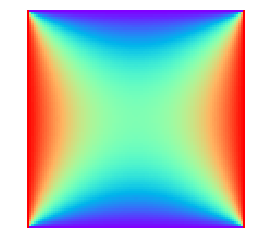

In [3]:
import matplotlib.pyplot as plt

img=plt.imshow(G)
img.set_cmap('rainbow')
plt.axis('off')
plt.show()

Profile our code and compare it with the code done in class. Is your code quicker? If not, why?

Hint: the sparce solver __spsolve__ might be using a much more error threshold.

Can you implement the function __build_matrix_and_vector__ without using any __if__ statement condition?

In [4]:
%prun G = solve_heat_equation(100)

##### My code is taking much more time than the professor's code because in this code I am travesing each and every element of the matrix and than I am finding the diagonal element after finding the diagnol element I am making the changes in the matrix. This makes the code highly complex the order of complexity is O(m^2) then I am again running 2 loops to compute matrix y. the loop for Matrix M runs for (98)^2*(98)^2